In [1]:
import elasticsearch
from datetime import datetime

In [2]:
country="chile"
from_="2022-03-01"
to_="2022-03-31"
media_outlets=["elllanquihue","elaustral","laestrelladechiloe","elheraldoaustral","radiosago",
               "elrepuertero","elvacanudo","elhuemul","seminariolocal","elquellonino","elinsular",
               "radiopudeto","radioacogida","elcalbucano","segundos33",
               "prensadelestuario","fresiaahora","soychiloe"]

keyword=""
simple_keyword=False

In [3]:
IP = "search.sophia2.org"
PORT = 9200
USER= "elastic"
PASS= "AxahEIWKsagna321"

In [4]:
#NO MODIFICAR

es = elasticsearch.Elasticsearch(
    IP,
    #port=PORT,
    http_auth=(USER, PASS)
)

In [5]:
#NO MODIFICAR
match=""
if (simple_keyword):
    match="match"
else:
    match="match_phrase"

query = { 
    "bool": { 

    "filter": [
        {"range": {
      "date": {
        "gte": from_,
        "lt": to_
      }}},
        { "term":  { "country": country }},
    ]
    }  
}

In [6]:
res = es.search(index="news", query=query, size=10000)
print("Son %d noticias encontradas..." % res['hits']['total']['value'])

Son 4539 noticias encontradas...


### Guardar noticias

In [7]:
import pandas as pd

data = {'id_news':[],'country':[],'media_outlet':[],'url':[],'title':[],'text':[],'date':[],'search':[]}

df = pd.DataFrame(data)  
  
for hit in res['hits']['hits']:
    id_news = hit['_source']['id_news']
    country = hit['_source']['country']
    media_outlet = hit['_source']['media_outlet']
    url = hit['_source']['url']
    title = hit['_source']['title']
    text = hit['_source']['text']
    date = hit['_source']['date']
    search = keyword
    
    new_row = {'id_news':id_news, 'country':country, 'media_outlet':media_outlet, 'url':url, 'title':title, 'text':text, 'date':date, 'search':search}
    
    df = df.append(new_row, ignore_index=True)

df.to_csv("noticias_semestre.csv")

In [8]:
df = pd.read_csv("noticias_semestre.csv", index_col=0)

df

,id_news,country,media_outlet,url,title,text,date,search
0,47145681.0,chile,eltrabajo,https://eltrabajo.cl/portal/conductor-muere-en...,Conductor muere en colisión frontal en fatídic...,"Tragedia en ruta 60 CH, sector peaje, en Panqu...",2022-03-01,NaN
1,47145692.0,chile,eltrabajo,https://eltrabajo.cl/portal/vecinos-de-el-asie...,Vecinos de El Asiento rechazan construcción de...,Temen que el recurso hídrico lo vendan a los a...,2022-03-01,NaN
2,47145705.0,chile,eltrabajo,https://eltrabajo.cl/portal/notable-descenso-e...,Notable descenso en casos de Covid 19 provoca ...,Más del 70% de personas hospitalizadas no ha r...,2022-03-01,NaN
3,47145728.0,chile,eltrabajo,https://eltrabajo.cl/portal/nos-dejo-maria-eli...,"Nos dejó María Eliana Carvallo, madre del prof...",Sus restos fueron cremados en Santiago: Con gr...,2022-03-01,NaN
4,47145764.0,chile,eltrabajo,https://eltrabajo.cl/portal/jean-paul-pineda-b...,Jean Paul Pineda buscará renacer en el Uní Uní,Como una ocasión única en su extensa carrera d...,2022-03-01,NaN
...,...,...,...,...,...,...,...,...
4534,47776228.0,chile,suractual,https://www.suractual.cl/2022/03/15/manifestac...,Manifestación contra Central Hidroeléctrica Ru...,Ante la agresión de la que fue objeto el Gober...,2022-03-15,NaN
4535,47776235.0,chile,suractual,https://www.suractual.cl/2022/03/02/comision-d...,Comisión de Evaluación Ambiental de gobierno d...,Así se los informó en una reunión la directora...,2022-03-02,NaN
4536,47774605.0,chile,suractual,https://www.suractual.cl/2022/03/29/realizan-p...,Realizan primer estudio geomorfológico del río...,"Actualmente, la Secretaría Comunal de Planific...",2022-03-29,NaN
4537,47779617.0,chile,suractual,https://www.suractual.cl/2022/03/21/talcahuano...,Talcahuano recibió el primer crucero de pasaje...,Los pasajeros fueron recibidos con canciones t...,2022-03-21,NaN


In [9]:
import spacy
nlp = spacy.load("es_core_news_md")
from spacy.matcher import PhraseMatcher


In [10]:
cities = ["Ancud","Castro","Chonchi",
           "Curaco de Vélez", "Dalcahue","Puqueldón",
          "Queilén","Quemchi","Quellón",
           "Quinchao","Calbuco","Cochamó",
          "Fresia","Frutillar","Llanquihue",
           "Los Muermos","Maullín","Puerto Montt",
          "Puerto Varas","Osorno","Puerto Octay",
          "Purranque","Puyehue","Río Negro",
           "San Juan de la Costa","San Pablo","Chaitén",
          "Futaleufú","Hualaihué","Palena"]

In [11]:
matcher_cities = PhraseMatcher(nlp.vocab)

for city in cities:
    matcher_cities.add(city, [nlp(city)])

In [12]:
import pandas

archivo = "./noticias_semestre.csv"
dataset = pandas.read_csv(archivo)

In [13]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)  

In [14]:
dataset_cities = pd.DataFrame()  
cont=0

for index,row in dataset.iterrows():
    print(index)
    txt = row["text"]
    
    try:
    
        doc = nlp(txt)
        matches_cities = matcher_cities(doc)

        for match_id, start, end in matches_cities:
            span = doc[start:end]  # The matched span
            cont+=1
            dataset_cities = dataset_cities.append(row, ignore_index=True)

    except:
        pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


In [15]:
#keywords = ["Ecología", "Cambio climático", "Conservación", "Sostenibilidad", "Energía renovable", "Contaminación", "Reciclaje", "Biodiversidad", "Agricultura sostenible", "Desarrollo sostenible", "Residuos", "Calidad del aire", "Calidad del agua", "Bosques", "Pesca sostenible", "Minería sostenible"]
#keywords = ["Aprendizaje", "Enseñanza", "Currículo", "Estudiante", "Profesor", "Escuela", "Clase", "Lección", "Evaluación", "Habilidades", "Técnicas de enseñanza", "Tecnología educativa", "Educación en línea", "Educación a distancia"]
#keywords = ["Turismo", "Atractivos turísticos", "Infraestructura turística", "Planificación turística", "Marketing turístico", "Sostenibilidad turística", "Turismo rural", "Turismo cultural", "Turismo de aventura", "Turismo de negocios", "Turismo de naturaleza", "Restauración turística", "Transporte turístico", "Guías turísticos", "Alojamiento turístico"]

matcher_keywords = PhraseMatcher(nlp.vocab)

for keyword in keywords:
    matcher_keywords.add(keyword, [nlp(keyword)])


dataset_keywords_cities = pd.DataFrame()  
    
cont=0

for index,row in dataset_cities.iterrows():
    print(index)
    txt = row["text"]
    
    try:
    
        doc = nlp(txt)
        matches_keywords = matcher_keywords(doc)

        for match_id, start, end in matches_keywords:
            span = doc[start:end]  # The matched span
            cont+=1
            dataset_keywords_cities = dataset_keywords_cities.append(row, ignore_index=True)

    except:
        pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


In [16]:
dataset_keywords_cities

,id_news,country,media_outlet,url,title,text,date,search
0,47670200.0,chile,radiopudeto,http://www.pudeto.cl/?p=57106,Saesa apoya sellos educativos de escuelas espe...,"Sumándose a la escuela de Huyar Alto, en la co...",2022-03-26,NaN
1,47670200.0,chile,radiopudeto,http://www.pudeto.cl/?p=57106,Saesa apoya sellos educativos de escuelas espe...,"Sumándose a la escuela de Huyar Alto, en la co...",2022-03-26,NaN
2,47670200.0,chile,radiopudeto,http://www.pudeto.cl/?p=57106,Saesa apoya sellos educativos de escuelas espe...,"Sumándose a la escuela de Huyar Alto, en la co...",2022-03-26,NaN
3,47670200.0,chile,radiopudeto,http://www.pudeto.cl/?p=57106,Saesa apoya sellos educativos de escuelas espe...,"Sumándose a la escuela de Huyar Alto, en la co...",2022-03-26,NaN
4,47670200.0,chile,radiopudeto,http://www.pudeto.cl/?p=57106,Saesa apoya sellos educativos de escuelas espe...,"Sumándose a la escuela de Huyar Alto, en la co...",2022-03-26,NaN
...,...,...,...,...,...,...,...,...
457,47687300.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Más empoderadas que nunca mujeres conmemoran s...,"Marchas, huelga, conversatorios y reconocimien...",2022-03-07,NaN
458,47845730.0,chile,elheraldoaustral,https://www.eha.cl/noticia/actualidad/represen...,Representantes de la industria de la música de...,Por medio de un stand en el sector Lolla Indus...,2022-03-26,NaN
459,47845730.0,chile,elheraldoaustral,https://www.eha.cl/noticia/actualidad/represen...,Representantes de la industria de la música de...,Por medio de un stand en el sector Lolla Indus...,2022-03-26,NaN
460,47845730.0,chile,elheraldoaustral,https://www.eha.cl/noticia/actualidad/represen...,Representantes de la industria de la música de...,Por medio de un stand en el sector Lolla Indus...,2022-03-26,NaN


In [17]:
dataset_keywords_cities['url'].duplicated().any()

True

In [18]:
dataset_keywords_cities = dataset_keywords_cities.drop_duplicates(subset='url', keep='first')

dataset_keywords_cities

,id_news,country,media_outlet,url,title,text,date,search
0,47670200.0,chile,radiopudeto,http://www.pudeto.cl/?p=57106,Saesa apoya sellos educativos de escuelas espe...,"Sumándose a la escuela de Huyar Alto, en la co...",2022-03-26,NaN
12,47670207.0,chile,radiopudeto,http://www.pudeto.cl/?p=57098,ESCUELA DE CHACAO CONTINUA CON PROBLEMAS DIJO ...,Finalizando la tarde de hoy una intensa jornad...,2022-03-25,NaN
13,47670220.0,chile,radiopudeto,http://www.pudeto.cl/?p=57069,Centro Acuícola y Pesquero CAPIA UST: investig...,El Centro Acuícola Pesquero de Investigación A...,2022-03-24,NaN
15,47688278.0,chile,diariodevaldivia,https://www.diariodevaldivia.cl/noticia/educac...,Retorno presencial: Conoce cómo recibirá la UA...,La Universidad Austral de Chile recibirá a sus...,2022-03-04,NaN
21,47688953.0,chile,diariodevaldivia,https://www.diariodevaldivia.cl/noticia/actual...,Más empoderadas que nunca mujeres conmemoran s...,"Marchas, huelga, conversatorios y reconocimien...",2022-03-07,NaN
26,47588358.0,chile,radiosago,https://www.radiosago.cl/apoderados-deponen-to...,Apoderados deponen toma de escuela Villa Chaca...,Durante las últimas horas se realizó una reuni...,2022-03-11,NaN
27,47588218.0,chile,radiosago,https://www.radiosago.cl/evacuan-escuela-de-nu...,Evacúan escuela de Nueva Braunau en Puerto Var...,Hace algunos minutos se inició la evacuación d...,2022-03-21,NaN
28,47616058.0,chile,elrepuertero,https://www.elrepuertero.cl/noticia/sociedad/m...,Mujer es acusada por venta de marihuana en ext...,"Al exterior de la Escuela Alemania, uniformado...",2022-03-22,NaN
30,47334627.0,chile,radioacogida,https://radioacogida.cl/saesa-apoya-el-inicio-...,Saesa apoya el inicio del año escolar en estab...,18 marzo 2022.- Durante todo el mes de marzo l...,2022-03-18,NaN
46,47349724.0,chile,elheraldoaustral,https://www.eha.cl/noticia/local/hoy-en-puerto...,"Hoy en Puerto Varas, Llanquihue y Frutillar Fu...","Para Rafaela, la única posibilidad de sobreviv...",2022-03-19,NaN


In [19]:
dataset_keywords_cities.to_csv("./"+"dataset_educacion.csv")

In [20]:
archivo = "./dataset_educacion.csv"

dataset = pandas.read_csv(archivo)

dataset

,Unnamed: 0,id_news,country,media_outlet,url,title,text,date,search
0,0,47670200.0,chile,radiopudeto,http://www.pudeto.cl/?p=57106,Saesa apoya sellos educativos de escuelas espe...,"Sumándose a la escuela de Huyar Alto, en la co...",2022-03-26,NaN
1,12,47670207.0,chile,radiopudeto,http://www.pudeto.cl/?p=57098,ESCUELA DE CHACAO CONTINUA CON PROBLEMAS DIJO ...,Finalizando la tarde de hoy una intensa jornad...,2022-03-25,NaN
2,13,47670220.0,chile,radiopudeto,http://www.pudeto.cl/?p=57069,Centro Acuícola y Pesquero CAPIA UST: investig...,El Centro Acuícola Pesquero de Investigación A...,2022-03-24,NaN
3,15,47688278.0,chile,diariodevaldivia,https://www.diariodevaldivia.cl/noticia/educac...,Retorno presencial: Conoce cómo recibirá la UA...,La Universidad Austral de Chile recibirá a sus...,2022-03-04,NaN
4,21,47688953.0,chile,diariodevaldivia,https://www.diariodevaldivia.cl/noticia/actual...,Más empoderadas que nunca mujeres conmemoran s...,"Marchas, huelga, conversatorios y reconocimien...",2022-03-07,NaN
5,26,47588358.0,chile,radiosago,https://www.radiosago.cl/apoderados-deponen-to...,Apoderados deponen toma de escuela Villa Chaca...,Durante las últimas horas se realizó una reuni...,2022-03-11,NaN
6,27,47588218.0,chile,radiosago,https://www.radiosago.cl/evacuan-escuela-de-nu...,Evacúan escuela de Nueva Braunau en Puerto Var...,Hace algunos minutos se inició la evacuación d...,2022-03-21,NaN
7,28,47616058.0,chile,elrepuertero,https://www.elrepuertero.cl/noticia/sociedad/m...,Mujer es acusada por venta de marihuana en ext...,"Al exterior de la Escuela Alemania, uniformado...",2022-03-22,NaN
8,30,47334627.0,chile,radioacogida,https://radioacogida.cl/saesa-apoya-el-inicio-...,Saesa apoya el inicio del año escolar en estab...,18 marzo 2022.- Durante todo el mes de marzo l...,2022-03-18,NaN
9,46,47349724.0,chile,elheraldoaustral,https://www.eha.cl/noticia/local/hoy-en-puerto...,"Hoy en Puerto Varas, Llanquihue y Frutillar Fu...","Para Rafaela, la única posibilidad de sobreviv...",2022-03-19,NaN


In [21]:
import pandas
archivo = "./dataset_educacion.csv"
corpus = pandas.read_csv(archivo)

noticias = corpus.text.values.tolist()

In [22]:
corpus

,Unnamed: 0,id_news,country,media_outlet,url,title,text,date,search
0,0,47670200.0,chile,radiopudeto,http://www.pudeto.cl/?p=57106,Saesa apoya sellos educativos de escuelas espe...,"Sumándose a la escuela de Huyar Alto, en la co...",2022-03-26,NaN
1,12,47670207.0,chile,radiopudeto,http://www.pudeto.cl/?p=57098,ESCUELA DE CHACAO CONTINUA CON PROBLEMAS DIJO ...,Finalizando la tarde de hoy una intensa jornad...,2022-03-25,NaN
2,13,47670220.0,chile,radiopudeto,http://www.pudeto.cl/?p=57069,Centro Acuícola y Pesquero CAPIA UST: investig...,El Centro Acuícola Pesquero de Investigación A...,2022-03-24,NaN
3,15,47688278.0,chile,diariodevaldivia,https://www.diariodevaldivia.cl/noticia/educac...,Retorno presencial: Conoce cómo recibirá la UA...,La Universidad Austral de Chile recibirá a sus...,2022-03-04,NaN
4,21,47688953.0,chile,diariodevaldivia,https://www.diariodevaldivia.cl/noticia/actual...,Más empoderadas que nunca mujeres conmemoran s...,"Marchas, huelga, conversatorios y reconocimien...",2022-03-07,NaN
5,26,47588358.0,chile,radiosago,https://www.radiosago.cl/apoderados-deponen-to...,Apoderados deponen toma de escuela Villa Chaca...,Durante las últimas horas se realizó una reuni...,2022-03-11,NaN
6,27,47588218.0,chile,radiosago,https://www.radiosago.cl/evacuan-escuela-de-nu...,Evacúan escuela de Nueva Braunau en Puerto Var...,Hace algunos minutos se inició la evacuación d...,2022-03-21,NaN
7,28,47616058.0,chile,elrepuertero,https://www.elrepuertero.cl/noticia/sociedad/m...,Mujer es acusada por venta de marihuana en ext...,"Al exterior de la Escuela Alemania, uniformado...",2022-03-22,NaN
8,30,47334627.0,chile,radioacogida,https://radioacogida.cl/saesa-apoya-el-inicio-...,Saesa apoya el inicio del año escolar en estab...,18 marzo 2022.- Durante todo el mes de marzo l...,2022-03-18,NaN
9,46,47349724.0,chile,elheraldoaustral,https://www.eha.cl/noticia/local/hoy-en-puerto...,"Hoy en Puerto Varas, Llanquihue y Frutillar Fu...","Para Rafaela, la única posibilidad de sobreviv...",2022-03-19,NaN


In [23]:
from spacy.matcher import Matcher
nlp = spacy.load("es_core_news_sm")
matcher = Matcher(nlp.vocab)

In [24]:
#!pip install gensim

import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

In [26]:
def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

In [27]:
noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


In [28]:
# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

In [29]:
texts = noticias_procesadas
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

In [56]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [57]:
lda_model.save('./lda_model_noticias_semana_5')

In [58]:
from pprint import pprint

pprint(lda_model.print_topics(num_words=100))

[(0,
  '0.015*"donante" + 0.011*"lugar" + 0.009*"leucemia" + 0.009*"donante '
  'compatible" + 0.008*"marzo" + 0.006*"vida" + 0.006*"oportunidad" + '
  '0.006*"posibilidad" + 0.006*"mieloide aguda" + 0.006*"pacientes" + '
  '0.006*"oportunidad de vida" + 0.006*"mieloide" + 0.006*"sede" + '
  '0.005*"personas" + 0.005*"profesora" + 0.005*"origen" + 0.005*"registrarte" '
  '+ 0.004*"tiempo" + 0.004*"años" + 0.004*"DKMS" + 0.004*"tipo" + '
  '0.004*"potencial" + 0.004*"derecho" + 0.003*"nivel" + 0.003*"ganadora" + '
  '0.003*"estudios" + 0.003*"momento" + 0.003*"video" + 0.003*"campaña" + '
  '0.003*"embajadores" + 0.002*"manera" + 0.002*"horas" + 0.002*"niños" + '
  '0.002*"fecha" + 0.002*"escuela" + 0.002*"recursos" + 0.002*"ganador" + '
  '0.002*"región" + 0.002*"acuerdo" + 0.002*"país" + 0.002*"lugares" + '
  '0.002*"varones" + 0.002*"competencia" + 0.002*"derrame" + 0.002*"ácido" + '
  '0.002*"ácido nítrico" + 0.002*"profesor" + 0.002*"experiencia" + '
  '0.002*"derrame de ácido" + 0

In [59]:
#Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

C:\Users\marce\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.239117 -0.028851       1        1  23.904137
1      0.009257  0.110644       2        1  17.308572
3     -0.010145  0.101771       3        1  11.849914
8     -0.008161 -0.127146       4        1  11.640643
2     -0.043432  0.077093       5        1  11.515886
0     -0.075651 -0.107614       6        1   7.979023
7     -0.004164 -0.001725       7        1   6.693810
6     -0.032788  0.011184       8        1   4.983350
5     -0.047320 -0.023854       9        1   2.217228
9     -0.026714 -0.011502      10        1   1.907436, topic_info=             Term       Freq      Total Category  logprob  loglift
629       mujeres  39.000000  39.000000  Default  30.0000  30.0000
1181         agua  25.000000  25.000000  Default  29.0000  29.0000
397   actividades  39.000000  39.000000  Default  28.0000  28.0000
396     actividad  32.000000  32.000000  Default  27.0000  27.0000
439         horas  53.000000  53.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
851       lugares   0.348411   8.157886  Topic10  -6.0527   0.8061
606        jueves   0.348356   6.775994  Topic10  -6.0529   0.9915
49       escuelas   0.348275   8.695108  Topic10  -6.0531   0.7419
615         marco   0.348264  14.694080  Topic10  -6.0532   0.2172
864   posibilidad   0.348150   7.370034  Topic10  -6.0535   0.9069

[606 rows x 6 columns], token_table=      Topic      Freq                        Term
term                                             
2164      8  0.842664                           #
2165      8  0.842669                #elcalbucano
2601      4  0.858981                           $
1251      3  0.940553  Agradecimientos especiales
2108      7  0.795491                Andrés Bello
...     ...       ...                         ...
2012      8  0.576317           área de educación
1249      9  0.746424            área de párvulos
500       1  0.855205                       áreas
500       3  0.095023                       áreas
500       7  0.095023                       áreas

[930 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 9, 3, 1, 8, 7, 6, 10])

In [60]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(dataset))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=noticias_procesadas, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.703930447470823

Coherence Score:  0.4513886338641422


In [35]:
### NO CAMBIAR ESTA CELDA###

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        
        model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [36]:
start=2
limit=15
step=2

In [37]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=dataset, texts=noticias_procesadas, start=start, limit=limit, step=step)

2
4
6
8
10
12
14


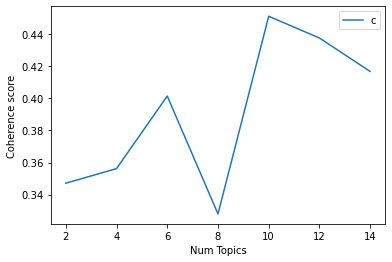

In [38]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [39]:
optimal_model = model_list[5]

In [40]:
archivo='./optimal_model_noticias_semana_12'

In [41]:
optimal_model.save(archivo)

In [42]:
from gensim.models import LdaModel

optimal_model = LdaModel.load(archivo, mmap='r')

In [43]:
from gensim.models import LdaModel

optimal_model = LdaModel.load(archivo, mmap='r')

In [44]:
def format_topics_documents(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_documents(ldamodel=optimal_model, corpus=dataset, texts=noticias)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.9969,"ciencia, caracoles, proyecto, año, niños, trab...","Sumándose a la escuela de Huyar Alto, en la co..."
1,1,11.0,0.9904,"educación, años, lugar, vida, desarrollo, niño...",Finalizando la tarde de hoy una intensa jornad...
2,2,3.0,0.9989,"proyecto, través, desarrollo, región, año, tra...",El Centro Acuícola Pesquero de Investigación A...
3,3,7.0,0.9983,"actividades, estudiantes, marzo, horas, comuni...",La Universidad Austral de Chile recibirá a sus...
4,4,4.0,0.9988,"mujeres, horas, actividad, marzo, género, acti...","Marchas, huelga, conversatorios y reconocimien..."
5,5,3.0,0.9947,"proyecto, través, desarrollo, región, año, tra...",Durante las últimas horas se realizó una reuni...
6,6,10.0,0.9891,"ciencia, caracoles, proyecto, año, niños, trab...",Hace algunos minutos se inició la evacuación d...
7,7,1.0,0.9889,"marzo, actividades, niños, humedales, espacios...","Al exterior de la Escuela Alemania, uniformado..."
8,8,11.0,0.9959,"educación, años, lugar, vida, desarrollo, niño...",18 marzo 2022.- Durante todo el mes de marzo l...
9,9,0.0,0.9961,"donante, leucemia, donante compatible, vida, o...","Para Rafaela, la única posibilidad de sobreviv..."


In [45]:
media_outlet = corpus.filter(['media_outlet'], axis=1)
df_dominant_topic=df_dominant_topic.join(media_outlet)
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,0,10.0,0.9969,"ciencia, caracoles, proyecto, año, niños, trab...","Sumándose a la escuela de Huyar Alto, en la co...",radiopudeto
1,1,11.0,0.9904,"educación, años, lugar, vida, desarrollo, niño...",Finalizando la tarde de hoy una intensa jornad...,radiopudeto
2,2,3.0,0.9989,"proyecto, través, desarrollo, región, año, tra...",El Centro Acuícola Pesquero de Investigación A...,radiopudeto
3,3,7.0,0.9983,"actividades, estudiantes, marzo, horas, comuni...",La Universidad Austral de Chile recibirá a sus...,diariodevaldivia
4,4,4.0,0.9988,"mujeres, horas, actividad, marzo, género, acti...","Marchas, huelga, conversatorios y reconocimien...",diariodevaldivia
5,5,3.0,0.9947,"proyecto, través, desarrollo, región, año, tra...",Durante las últimas horas se realizó una reuni...,radiosago
6,6,10.0,0.9891,"ciencia, caracoles, proyecto, año, niños, trab...",Hace algunos minutos se inició la evacuación d...,radiosago
7,7,1.0,0.9889,"marzo, actividades, niños, humedales, espacios...","Al exterior de la Escuela Alemania, uniformado...",elrepuertero
8,8,11.0,0.9959,"educación, años, lugar, vida, desarrollo, niño...",18 marzo 2022.- Durante todo el mes de marzo l...,radioacogida
9,9,0.0,0.9961,"donante, leucemia, donante compatible, vida, o...","Para Rafaela, la única posibilidad de sobreviv...",elheraldoaustral


In [46]:
from pandasql import sqldf 

In [47]:
result = sqldf("SELECT Dominant_Topic, count(*) as nb_noticias FROM df_dominant_topic GROUP BY Dominant_Topic ORDER BY count(*) DESC")
result

,Dominant_Topic,nb_noticias
0,11.0,8
1,7.0,6
2,4.0,6
3,1.0,6
4,10.0,5
5,6.0,5
6,3.0,5
7,8.0,4
8,2.0,4
9,0.0,4


In [48]:
media_outlets

['elllanquihue',
 'elaustral',
 'laestrelladechiloe',
 'elheraldoaustral',
 'radiosago',
 'elrepuertero',
 'elvacanudo',
 'elhuemul',
 'seminariolocal',
 'elquellonino',
 'elinsular',
 'radiopudeto',
 'radioacogida',
 'elcalbucano',
 'segundos33',
 'prensadelestuario',
 'fresiaahora',
 'soychiloe']

In [49]:
dict_topic_cities = {cities[i]:[0]*12 for i in range (len(cities))}

# {osorno: [0,0,0,0,2,0,1,0,0,0,0,0]}

In [50]:
dict_topic_cities

{'Ancud': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Castro': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Chonchi': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Curaco de Vélez': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Dalcahue': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Puqueldón': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Queilén': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Quemchi': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Quellón': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Quinchao': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Calbuco': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Cochamó': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Fresia': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Frutillar': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Llanquihue': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Los Muermos': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Maullín': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Puerto Montt': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Puerto Varas': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Osorno': [0, 0, 0, 0,

In [51]:
df_cities_topic = pd.DataFrame(0, index=cities, columns=[f"Topic {i}" for i in range(12)])

In [52]:
for (i,new),(j, row) in zip(df_dominant_topic.iterrows(),  dataset_cities.iterrows()):
    txt = row["text"]
    try:
    
        doc = nlp(txt)
        matches_cities = matcher_cities(doc)

        for match_id, start, end in matches_cities:
            span = doc[start:end]  # The matched span
            dataset_cities.at[index,span.text.replace(" ","_")] = 1
            
            df_cities_topic[f"Topic {int(new[1])}"][str(span)] += 1
            
    except Exception as e:
        pass

In [53]:
df_cities_topic

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
Ancud,4,10,7,3,12,0,5,7,8,4,2,7
Castro,1,4,5,1,3,4,9,6,5,1,2,3
Chonchi,2,4,2,0,4,0,3,3,5,2,0,2
Curaco de Vélez,5,9,5,1,8,0,5,5,8,4,0,4
Dalcahue,4,8,4,0,8,0,4,4,8,4,0,4
Puqueldón,2,4,2,0,4,0,2,2,4,2,0,2
Queilén,0,0,0,0,0,0,0,0,0,0,0,0
Quemchi,0,0,0,0,0,0,0,0,0,0,0,0
Quellón,2,4,2,0,4,0,2,2,4,2,0,2
Quinchao,3,4,2,1,4,0,2,2,4,2,0,2


In [54]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

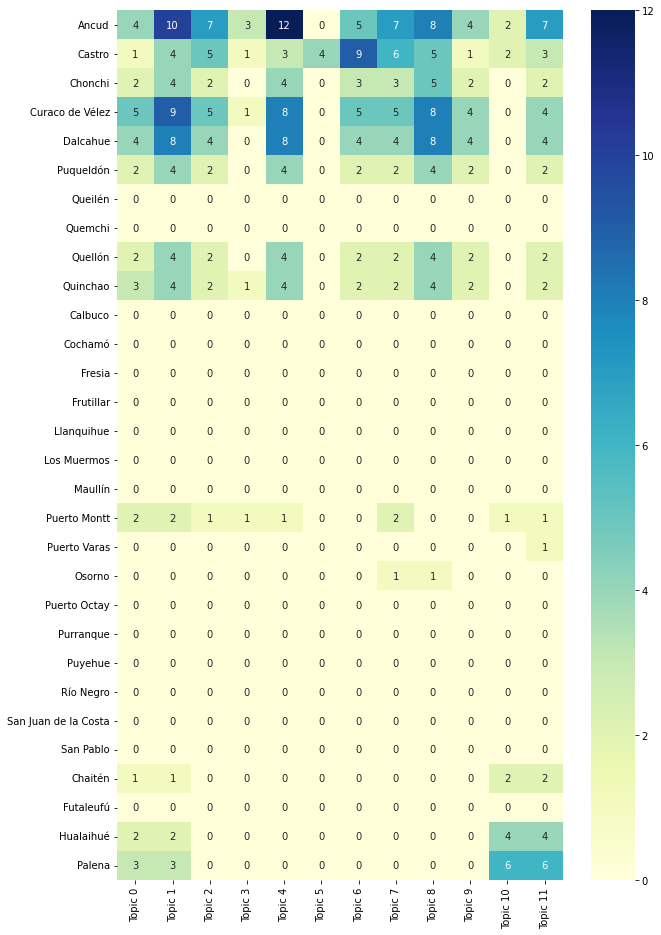

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 16))

sns.heatmap(df_cities_topic, annot=True, cmap="YlGnBu")